In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Load Data

In [ ]:
from google.colab import drive
def load_data():
  # Kết nối với Google Drive
  drive.mount('/content/drive')

  # Đường dẫn tới tệp tin dữ liệu trong Google Drive
  file_path = '/content/drive/MyDrive/Final/Banking.csv'

  # Đọc dữ liệu từ tệp tin
  data = pd.read_csv(file_path)
  return data
data = load_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


Dưới đây là giải thích các cột trong Banking dataset:

1. 'Loan_ID': ID của mỗi khoản vay

2. 'Loan_Amount_Requested': Đây là số tiền mà khách hàng yêu cầu vay từ ngân hàng.

3. 'Length_Employed': Đây là thời gian đã làm việc của khách hàng tính bằng năm. Cột này cho biết thời gian khách hàng đã làm việc trong công ty hiện tại hoặc tổ chức trước đó.

4. 'Home_Owner': Đây là tình trạng sở hữu nhà của khách hàng, ví dụ như sở hữu nhà riêng, thuê nhà, sống cùng người khác hoặc không có thông tin về tình trạng sở hữu nhà.

5. 'Annual_Income': Đây là thu nhập hàng năm của khách hàng, được tính bằng đơn vị tiền tệ.

6. 'Income_Verified': Đây là chỉ số cho biết xác minh thu nhập của khách hàng đã được thực hiện hay chưa. Có thể có các giá trị như "VERIFIED - income đã xác minh", "VERIFIED - income đã xác minh bằng tài liệu", hoặc "NOT VERIFIED - thu nhập chưa được xác minh".

7. 'Purpose_Of_Loan': Đây là mục đích vay tiền của khách hàng.

8. 'Debt_To_Income': Đây là tỷ lệ giữa tổng số nợ hiện tại và thu nhập hàng tháng của khách hàng. Đây là một chỉ số quan trọng để đánh giá khả năng thanh toán nợ của khách hàng.

9. 'Inquiries_Last_6Mo': Đây là số lần kiểm tra tín dụng trong vòng 6 tháng gần nhất. Chỉ số này cho biết số lần ngân hàng đã kiểm tra hồ sơ tín dụng của khách hàng trong khoảng thời gian đó.

10. 'Months_Since_Deliquency': Đây là số tháng kể từ lần vi phạm trước đó của khách hàng. Nếu khách hàng không có bất kỳ vi phạm nào, cột này có thể chứa giá trị thiếu (NaN).

11. 'Number_Open_Accounts': Đây là số lượng tài khoản mở của khách hàng tại ngân hàng hoặc tổ chức tín dụng khác.

12. 'Total_Accounts': Đây là tổng số tài khoản tín dụng mà khách hàng đang sở hữu, bao gồm cả tài khoản đã đóng và tài khoản đang hoạt động.

13. 'Gender': Đây là giới tính của khách hàng.

14. 'Interest_Rate': Đây là mức lãi suất được áp dụng cho khoản vay. Cột này chứa các giá trị dưới dạng phân loại để chỉ định mức lãi suất áp dụng cho khoản vay của khách hàng.
* Số 1: Đại diện cho mức lãi suất thấp (Low interest rate).
* Số 2: Đại diện cho mức lãi suất trung bình (Medium interest rate).
* Số 3: Đại diện cho mức lãi suất cao (High interest rate).


In [ ]:
data.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

# 2. Data Preprocessing

In [ ]:
# Check NaN
data.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [ ]:
for col in data.columns:
  print('{} has {} unique values.'.format(col, data[col].nunique()))

Loan_ID has 164309 unique values.
Loan_Amount_Requested has 1290 unique values.
Length_Employed has 11 unique values.
Home_Owner has 5 unique values.
Annual_Income has 12305 unique values.
Income_Verified has 3 unique values.
Purpose_Of_Loan has 14 unique values.
Debt_To_Income has 3953 unique values.
Inquiries_Last_6Mo has 9 unique values.
Months_Since_Deliquency has 122 unique values.
Number_Open_Accounts has 58 unique values.
Total_Accounts has 100 unique values.
Gender has 2 unique values.
Interest_Rate has 3 unique values.


In [ ]:
# Filter categorical features
cat_col = []
for col in data.columns:
  if data[col].nunique() <= 14:
    cat_col.append(col)

for col in cat_col:
  print('{} : {}'.format(col, data[col].unique()))

Length_Employed : ['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']
Home_Owner : ['Rent' 'Mortgage' nan 'Own' 'Other' 'None']
Income_Verified : ['not verified' 'VERIFIED - income' 'VERIFIED - income source']
Purpose_Of_Loan : ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']
Inquiries_Last_6Mo : [0 3 1 2 4 5 6 7 8]
Gender : ['Female' 'Male']
Interest_Rate : [1 3 2]


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats

def fill_missing_values(df):
    # Dùng Interative Imputer để điền vào các dữ liệu bị mất
    imputer = IterativeImputer(max_iter = 100,random_state = 42)
    imputed_data = imputer.fit_transform(df)
    data_imputed = pd.DataFrame(imputed_data, columns= df.columns)
    data_imputed = data_imputed.clip(lower=0)
    return data_imputed

def trans_data(data, columns):
    # Mã hóa các cột mang dữ liệu phân loại
    data['Length_Employed'] = data['Length_Employed'].replace({str(i) + ' ': i for i in range(1, 10)})
    for col in columns:
        if data[col].dtype == 'object':
            data[col] = data[col].astype('category').cat.codes
    return data

def preprocessing(data):
    data = data.copy()

    # Xử lý các dữ liệu không nhất quán và sai định dạng
    data.drop(['Loan_ID'], axis = 1, inplace = True)
    data['Length_Employed'] = data['Length_Employed'].apply(lambda x: str(x).replace('years', '').replace('year', ''))
    data['Length_Employed'] = data['Length_Employed'].replace({'< 1 ': 0, '10+ ': 10})
    data['Length_Employed'][data['Length_Employed'] == 'nan'] = np.nan
    data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].apply(lambda x: str(x).replace(',', '')).astype(np.float64)
    data['Home_Owner'].replace({'Other': np.nan, 'None': np.nan}, inplace=True)
    data['Purpose_Of_Loan'].replace({'other': np.nan}, inplace=True)
    return data

def format_data(data):
    # chuyển các cột về dạng số
    data = data.copy()
    columns = ['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income']
    for column in data.columns:
        if column in columns:
            data[column] = data[column].astype('float64')
        else:
            data[column] = data[column].astype('int64')
    return data

def remove_outliers(df):
  # Loại bỏ outlier
  z_scores = stats.zscore(df)
  threshold = 3
  data_score = df[(z_scores < threshold).all(axis=1)]
  return data_score

def clean(df):
    data = df.copy()
    data = preprocessing(data)
    cols = ['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']
    data = trans_data(data, cols)
    data.replace(-1, np.nan, inplace=True)
    data = fill_missing_values(data)
    data =  format_data(data)
    data = remove_outliers(data)
    return data

df = clean(data.copy())
df

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,0,2,68000.000000,2,0,18.37,0,38,9,14,0,1
1,30000.0,4,0,111601.673553,0,2,14.93,0,17,12,24,0,3
2,24725.0,7,0,75566.400000,1,2,15.88,0,31,12,16,1,3
3,16000.0,0,1,56160.000000,1,2,14.34,3,35,16,22,1,3
4,17000.0,8,1,96000.000000,1,2,22.17,1,36,19,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164302,24000.0,2,0,110000.000000,0,2,15.87,1,6,22,38,1,2
164303,35000.0,10,2,115000.000000,0,2,24.06,0,37,10,39,1,3
164304,20725.0,10,2,82423.466493,1,1,13.56,0,36,13,16,1,2
164306,20250.0,10,0,101555.652383,0,1,18.17,1,35,17,30,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151081 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    151081 non-null  float64
 1   Length_Employed          151081 non-null  int64  
 2   Home_Owner               151081 non-null  int64  
 3   Annual_Income            151081 non-null  float64
 4   Income_Verified          151081 non-null  int64  
 5   Purpose_Of_Loan          151081 non-null  int64  
 6   Debt_To_Income           151081 non-null  float64
 7   Inquiries_Last_6Mo       151081 non-null  int64  
 8   Months_Since_Deliquency  151081 non-null  int64  
 9   Number_Open_Accounts     151081 non-null  int64  
 10  Total_Accounts           151081 non-null  int64  
 11  Gender                   151081 non-null  int64  
 12  Interest_Rate            151081 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 16.1 MB


In [ ]:
for col in cat_col:
  print('{} : {}'.format(col, df[col].unique()))

Length_Employed : [ 0  4  7  8  2 10  1  6  9  5  3]
Home_Owner : [2 0 1]
Income_Verified : [2 0 1]
Purpose_Of_Loan : [0 2 1 4 6 7 3 5]
Inquiries_Last_6Mo : [0 3 1 2]
Gender : [0 1]
Interest_Rate : [1 3 2]


# 3. Data Analyst

##Heat map

<Axes: >

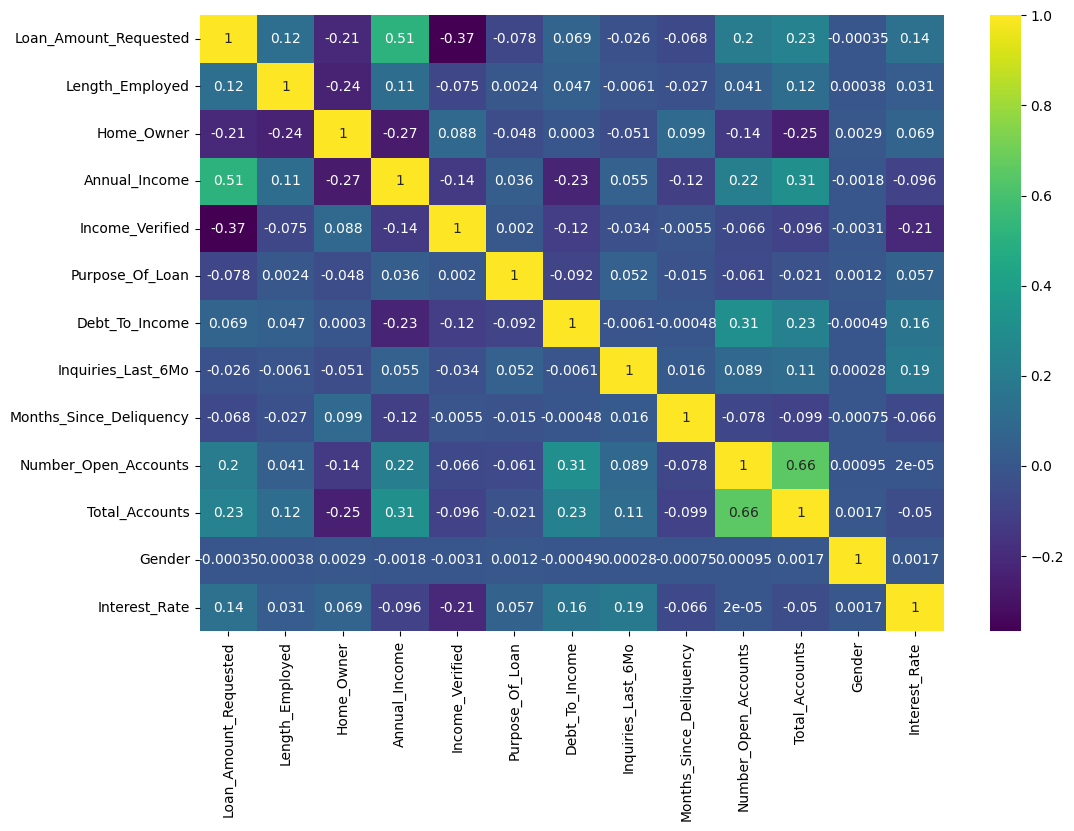

In [ ]:
plt.figure(figsize = [12, 8])
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

## Count plot

<Axes: title={'center': 'Target Variable classification'}, ylabel='Interest_Rate'>

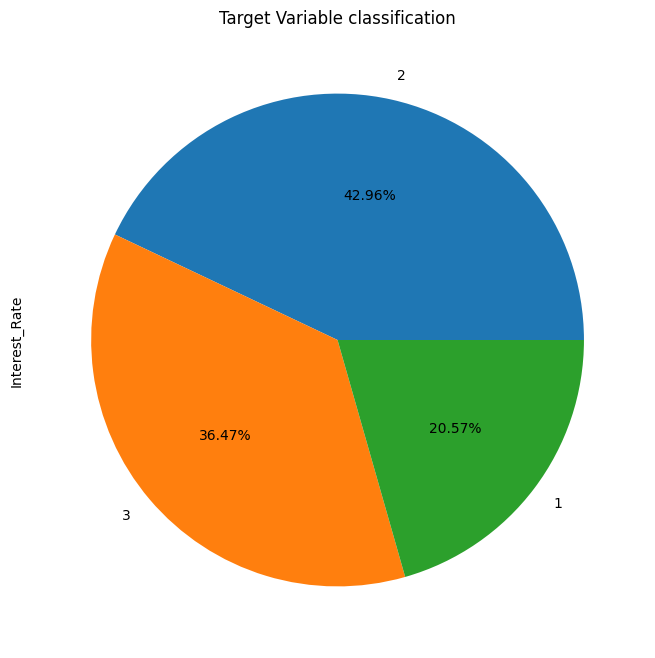

In [ ]:
data['Interest_Rate'].value_counts().plot.pie(autopct = '%1.2f%%',figsize = (12,8),title = 'Target Variable classification')

<Axes: xlabel='count', ylabel='Length_Employed'>

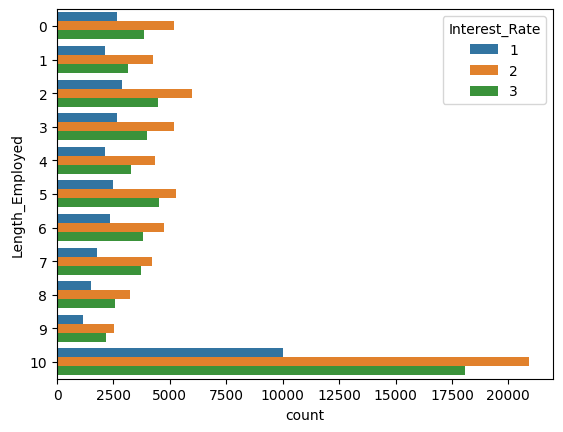

In [ ]:
sns.countplot(y = df['Length_Employed'], data = data, hue = data['Interest_Rate'])

In [ ]:
num_columns = []
cat_columns = []
for col in df.columns:
  if df[col].nunique() <= 14:
    cat_columns.append(col)
  else:
    num_columns.append(col)

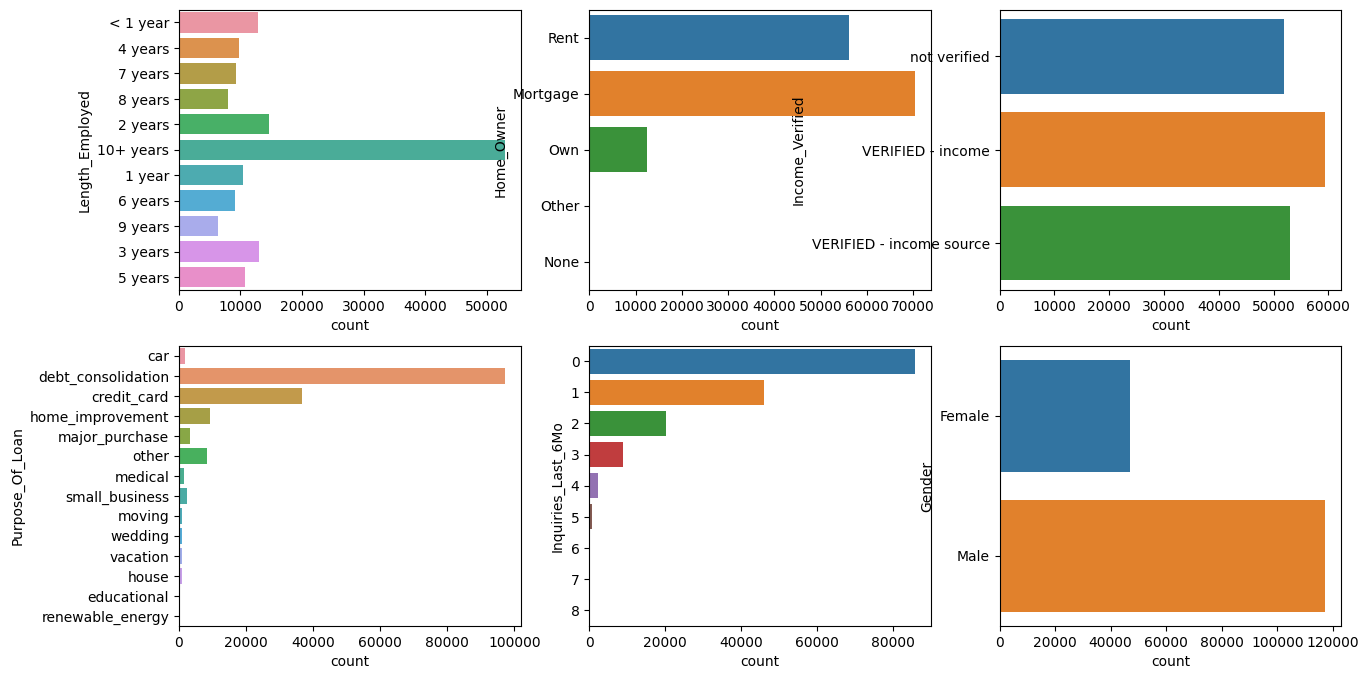

In [ ]:
i = 1
plt.figure(figsize = (15, 8))
for col in cat_col[:-1]:
  plt.subplot(2, 3, i)
 # plt.subplots_adjust(wspace= 0.9, hspace=0.2)
  sns.countplot(y = col, data = data)
  i += 1

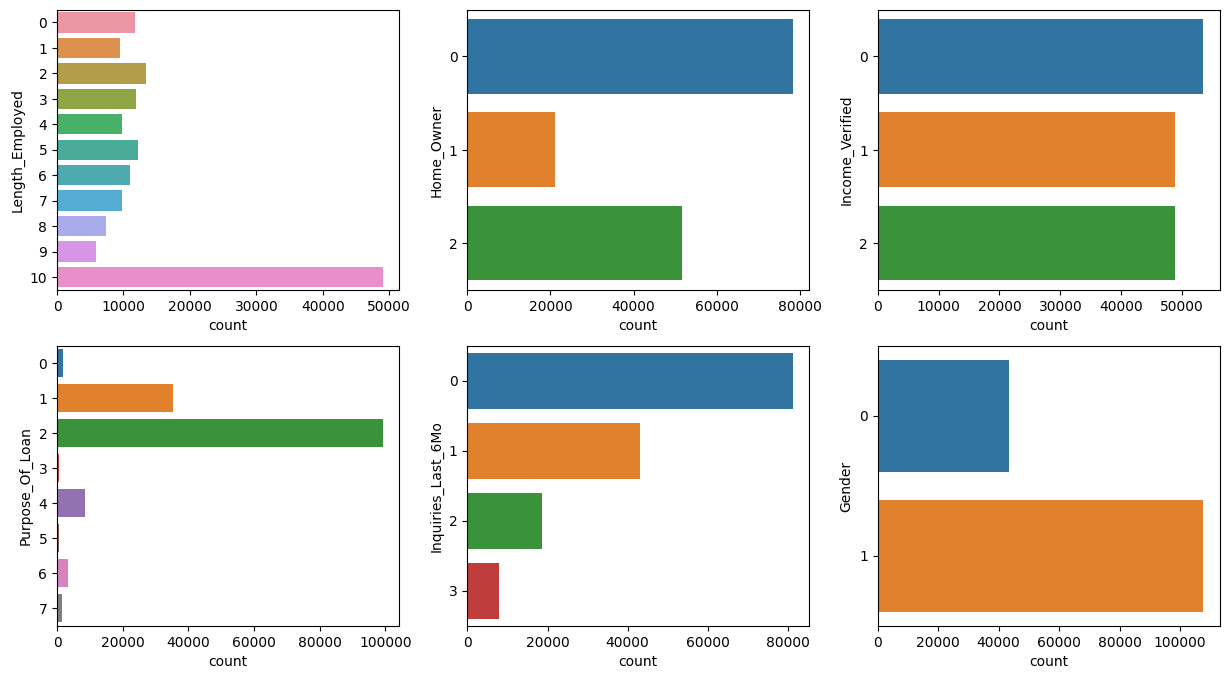

In [ ]:
i = 1
plt.figure(figsize = (15, 8))
for col in cat_col[:-1]:
  plt.subplot(2, 3, i)
 # plt.subplots_adjust(wspace= 0.9, hspace=0.2)
  sns.countplot(y = col, data = df)
  i += 1

##Box plot

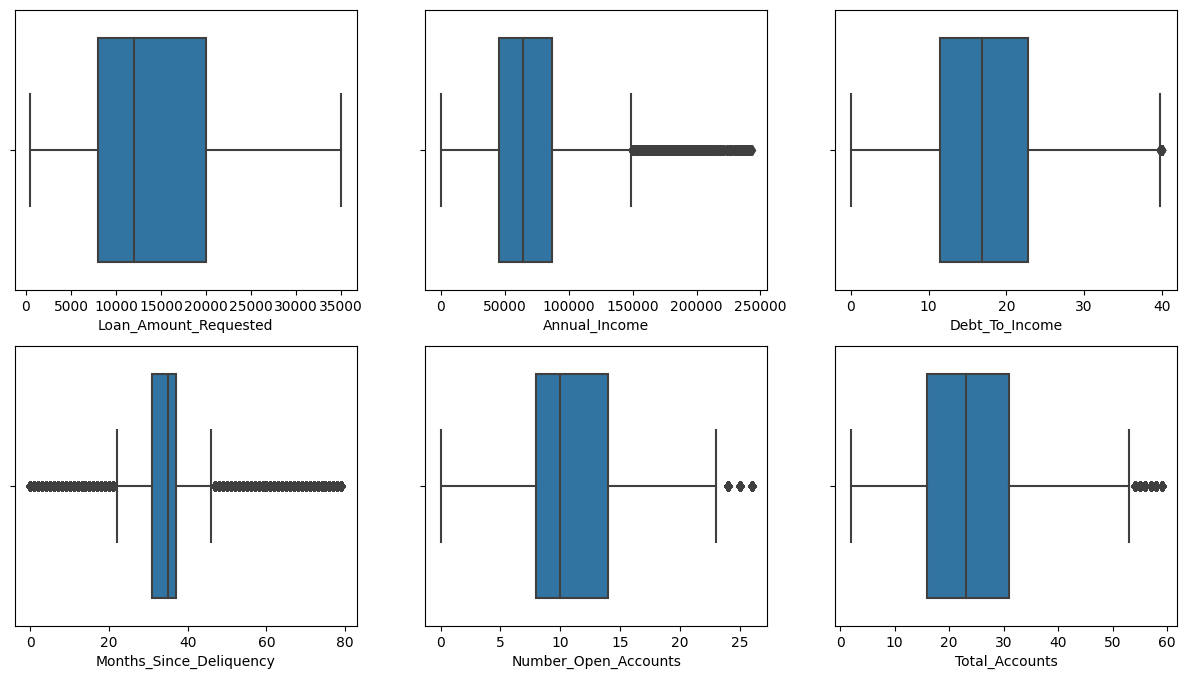

In [ ]:
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(15, 8))

for variable, subplot in zip(num_columns,ax.flatten()):
    z = sns.boxplot(x = df[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 10)

plt.show()

##Distribution plot

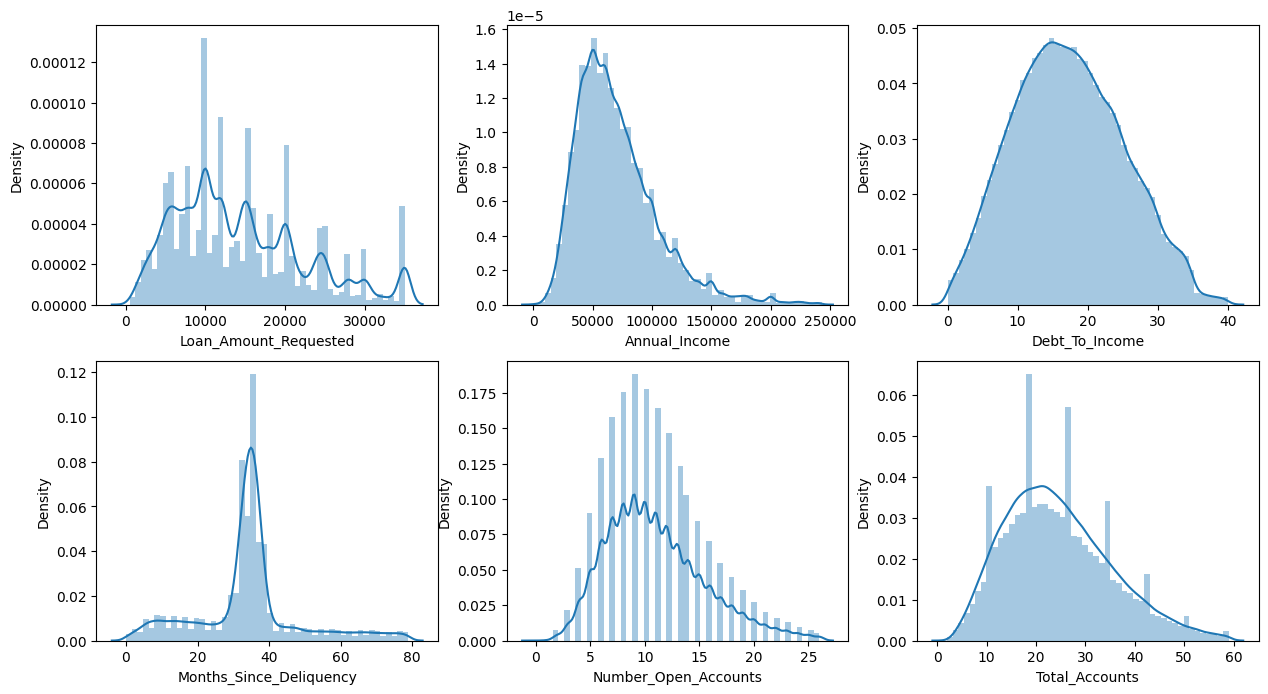

In [ ]:
i = 1
plt.figure(figsize = (15, 8))
for col in num_columns:
  plt.subplot(2, 3, i)
 # plt.subplots_adjust(wspace= 0.9, hspace=0.2)
  sns.distplot(df[col])
  i += 1

# 4. Model

##Split Data

In [ ]:
from sklearn.model_selection import train_test_split
def split_Data(df):
  X = df.drop(columns = 'Interest_Rate').values
  y = df['Interest_Rate'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_Data(df)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

def oversample(X, y):
    # In số lượng mẫu trước khi oversampling
    print("Số lượng mẫu trước khi oversampling:", Counter(y))

    # Áp dụng oversampling
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # In số lượng mẫu sau khi oversampling
    print("Số lượng mẫu sau khi oversampling:", Counter(y_resampled))

    return X_resampled, y_resampled

# Áp dụng oversampling
X_resampled, y_resampled = oversample(X_train, y_train)

Số lượng mẫu trước khi oversampling: Counter({2: 59260, 3: 48280, 1: 28432})
Số lượng mẫu sau khi oversampling: Counter({3: 59260, 2: 59260, 1: 59260})


##Evaluate model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,confusion_matrix,roc_auc_score, accuracy_score
def evaluate_model(y_true, y_pred):
    print("accuracy", accuracy_score(y_true, y_pred))
    print("precision", precision_score(y_true, y_pred,average= 'macro'))
    print("recall", recall_score(y_true, y_pred,average= 'macro'))
    print("F1", f1_score(y_true, y_pred,average= 'macro'))

    report = classification_report(y_true, y_pred)
    print("Classification Report\n",report)

    cm = confusion_matrix(y_true,y_pred)
    sns.heatmap(cm , annot = True,cmap ='icefire')

## Other models

### Decision Tree

accuracy 0.5509299093255675
precision 0.5431561650164695
recall 0.5447851848355777
F1 0.5439437635525649
Classification Report
               precision    recall  f1-score   support

           1       0.50      0.51      0.50      3234
           2       0.56      0.56      0.56      6530
           3       0.57      0.57      0.57      5345

    accuracy                           0.55     15109
   macro avg       0.54      0.54      0.54     15109
weighted avg       0.55      0.55      0.55     15109



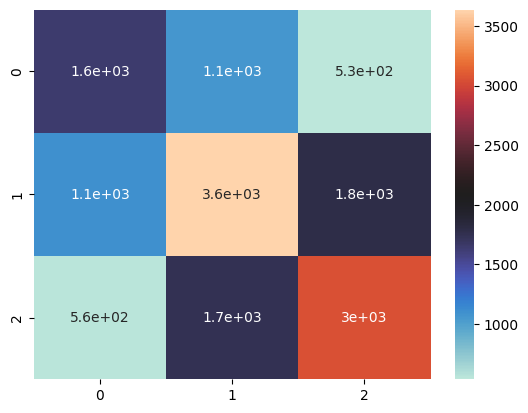

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
def build_Decision_Tree_Model(X_train,Y_train):
  #Khởi tạo pipepline
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('tree',DecisionTreeClassifier(criterion = 'gini',splitter = 'random'))
    ])
  # Huấn luyện pipeline trên dữ liệu huấn luyện
  model = pipeline.fit(X_train,Y_train)
  return model
Decision_tree_model = build_Decision_Tree_Model(X_train,y_train)
# Sử dụng mô hình để dự đoán kết quả trên tập kiểm tra
y_pred = Decision_tree_model.predict(X_test)

# Đánh giá mô hình
evaluate_model(y_test, y_pred)

###XGBOOST model

accuracy 0.7493546892580581
precision 0.7673007379922293
recall 0.7318562935984682
F1 0.745083519660707
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.64      0.72      3234
           1       0.71      0.80      0.75      6530
           2       0.78      0.75      0.76      5345

    accuracy                           0.75     15109
   macro avg       0.77      0.73      0.75     15109
weighted avg       0.76      0.75      0.75     15109



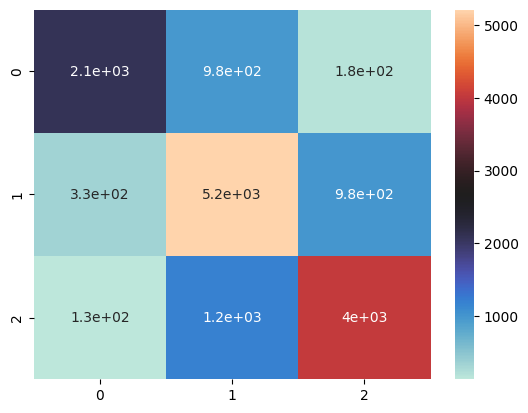

In [ ]:
import xgboost as xgb
# sklearn wrapper cho XGBoost gặp vấn đề khi giả định các nhãn của lớp bắt đầu từ 0 nên tập giá Y sẽ trừ đi 1
y_train_XG = y_train - 1
y_test_XG = y_test - 1
def build_XGBOOST_Model(X_train, Y_train):
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('xgb',xgb.XGBClassifier(max_depth=8, learning_rate=0.1, n_estimators=100)),
      ])
  model = pipeline.fit(X_train,Y_train)
  return model

XGBOOST_model = build_XGBOOST_Model(X_train,y_train_XG)
y_pred = XGBOOST_model.predict(X_test)
evaluate_model(y_test_XG,y_pred)

###CATBOOST model

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00


accuracy 0.7561056324045271
precision 0.7752450381094323
recall 0.7397728964150986
F1 0.7531374541608651
Classification Report
               precision    recall  f1-score   support

           1       0.83      0.66      0.74      3234
           2       0.71      0.81      0.76      6530
           3       0.78      0.75      0.77      5345

    accuracy                           0.76     15109
   macro avg       0.78      0.74      0.75     15109
weighted avg       0.76      0.76      0.76     15109



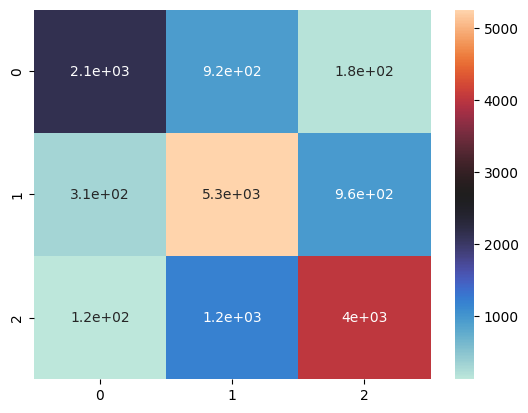

In [ ]:
from catboost import CatBoostClassifier

def build_CatBoost_Model(X_train, Y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('cat', CatBoostClassifier(iterations=200, depth=8, learning_rate=0.1, verbose=False))
        ])
    model = pipeline.fit(X_train, Y_train)
    return model

# Huấn luyện mô hình và dự đoán
CatBoost_model = build_CatBoost_Model(X_train, y_train)
y_pred = CatBoost_model.predict(X_test)
evaluate_model(y_test, y_pred)

## MLP Model

###MLP in sklearn

accuracy 0.7777483619035013
precision 0.8064117707903607
recall 0.7614431106426541
F1 0.7776833641557914
Classification Report
               precision    recall  f1-score   support

           1       0.89      0.69      0.78      3234
           2       0.72      0.85      0.78      6530
           3       0.81      0.74      0.77      5345

    accuracy                           0.78     15109
   macro avg       0.81      0.76      0.78     15109
weighted avg       0.79      0.78      0.78     15109



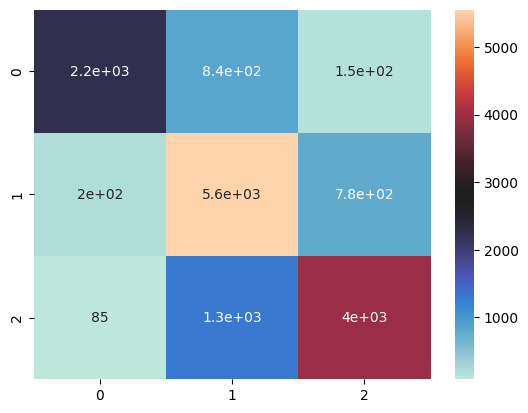

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report

def build_MLP_Model(X_train,Y_train):
  pipeline = Pipeline([
    ('scaler',  RobustScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes= (10, 100) ,activation = 'logistic', batch_size = 200, learning_rate = 'adaptive'))
    ])
  model = pipeline.fit(X_train, y_train)
  return model

MLP_model = build_MLP_Model(X_train,y_train)
y_pred = MLP_model.predict(X_test)
evaluate_model(y_test, y_pred)


### MLP in PyTorch

Epoch [1000/1000], Loss: 0.7664883732795715
accuracy 0.7767555761466676
precision 0.8046019819188598
recall 0.7598056529030238
F1 0.7759716627684293
Classification Report
               precision    recall  f1-score   support

           1       0.90      0.68      0.77      3234
           2       0.73      0.83      0.78      6530
           3       0.78      0.77      0.78      5345

    accuracy                           0.78     15109
   macro avg       0.80      0.76      0.78     15109
weighted avg       0.79      0.78      0.78     15109



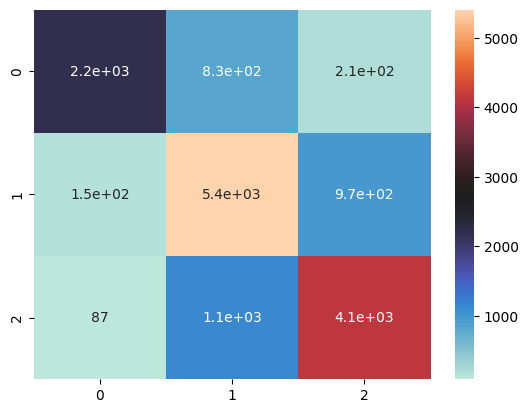

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Scale dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chuyển đổi dữ liệu từ numpy array sang tensor
X_train_tensor = torch.tensor(X_train_scaled).float()
y_train_tensor = torch.tensor(y_train - 1).long()
X_test_tensor = torch.tensor(X_test_scaled).float()
y_test_tensor = torch.tensor(y_test - 1).long()

# Sử dụng Tensor trong mô hình MLP
model = nn.Sequential(
    nn.Linear(12, 50),
    nn.ReLU(),
    nn.Linear(50, 3),  # Số lớp là 3 tương ứng với ba nhãn 0, 1, 2
    nn.Softmax(dim=1)
)

# Định nghĩa loss function và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass và cập nhật tham số
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # In thông tin huấn luyện
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()  # Chuyển đổi sang dạng mảng numpy
    # Chuyển đổi kết quả dự đoán sang dạng số nguyên
    predicted = predicted.astype(int)

    # Tính độ chính xác
    evaluate_model(y_test, predicted + 1)

accuracy 0.7660310496118798
precision 0.7727418363176245
recall 0.7660310496118798
F1 0.7669218106777619
Classification Report
               precision    recall  f1-score   support

           1       0.86      0.73      0.79     59260
           2       0.72      0.77      0.74     59260
           3       0.74      0.80      0.77     59260

    accuracy                           0.77    177780
   macro avg       0.77      0.77      0.77    177780
weighted avg       0.77      0.77      0.77    177780



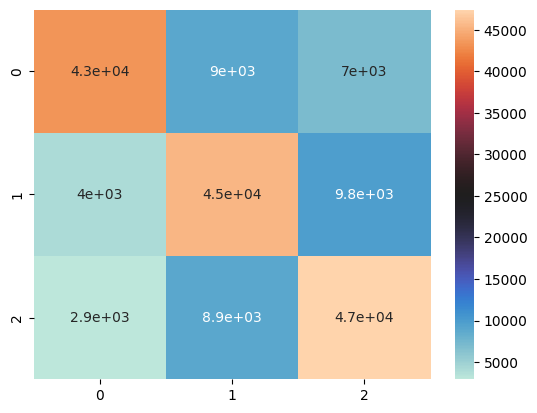

In [ ]:
# Kiểm tra với tập train
with torch.no_grad():
    model.eval()
    outputs = model(X_train_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()  # Chuyển đổi sang dạng mảng numpy
    # Chuyển đổi kết quả dự đoán sang dạng số nguyên
    predicted = predicted.astype(int)

    # Tính độ chính xác
    evaluate_model(y_train, predicted + 1)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X = df.drop(columns = 'Interest_Rate').values
y = df['Interest_Rate'].values

# Khởi tạo mô hình Logistic Regression
pipeline = Pipeline([
    ('scaler',  RobustScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes= (10, 100) ,activation = 'logistic', batch_size = 200, learning_rate = 'adaptive'))
])


# Thực hiện cross-validation với 5 folds
scores = cross_val_score(pipeline, X, y, cv = 5)

# In kết quả độ chính xác từ mỗi fold
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.77959427 0.77789913 0.78084459 0.7760789  0.77710485]
Average score: 0.7783043447559695


# 5. Discussion and Conclusion
## I. Xử lý dữ liệu
- Làm sạch:
  * Loan_Amount_Requested: mang kiểu object -> xóa dấu ',' rồi ép kiểu về float.
  * Home_Owner: Có giá trị 'None' mang ý nghĩa không xác định và có giá trị nan. -> Thay thế tất cả giá trị 'None' = nan -> thay nan bằng gía trị ước lượng.
  * Length_Employed: có giá trị nan -> Thay bằng giá trị ước lượng với các giá trị nan, chuẩn hóa giá trị cột về format 1,2,3...,10,.
  * Annual_Income và Months_Since_Deliquency: nan sẽ được thay bằng giá trị ước lượng.
  * Dùng IterativeImputer để điền các giá trị nan.
- Xử lý outlier: Dùng phương pháp z-score cho toàn bộ dữ liệu để loại bỏ các outlier.
- Trích xuất đặc trưng: Loại bỏ cột ID.

## II. Xây dựng mô hình:
- Chia data thành tập train và tập test theo tỉ lệ 8 : 2. Đồng thời oversampling data bằng SMOTE.
- Nhóm các mô hình máy học Decision tree, Xgboost, Catboost: Chúng tôi đã sử dụng các mô hình phân loại này để đào tạo, kiểm tra dữ liệu và chỉnh sửa các thông số như max_depth, learning_rate và n_estimators để đạt được kết quả tốt nhất.
- Mô hình deeplearning MLP: Đối với mô hình MLP, chúng tôi đã tùy chỉnh các tham số như số lượng tầng ẩn và số lượng nơ-ron trong mỗi tầng để tối ưu hóa hiệu suất. Mô hình này đã cho kết quả phân loại tốt.

## III. Kết luận:
- Xử lý được imbalace trong label -> cân đối giữa các độ đo.
- Tập train và tập test tương tự nhau về accuracy.
- Các model không có hiện tượng overfitting.  
